<a href="https://colab.research.google.com/github/Marianoorrego/Titanic_ADE_Taller/blob/main/Titanic_ADE_Taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Análisis de Datos Exploratorio (ADE)
## Resolución del Taller

Mariano Alejandro Orrego Zapata



In [ ]:
# CELDA 1 - Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [ ]:
# CELDA 2 - Cargar el dataset
file_path = "/train.csv"  # Tiene que subir el archivo y luego ejecutar
df = pd.read_csv(file_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# CELDA 3 - Primer vistazo al dataset
print("Primeras filas:")
display(df.head())
print("Últimas filas:")
display(df.tail())
print("Tamaño del dataset (filas, columnas):", df.shape)
print("\nInfo del DataFrame:")
display(df.info())

# Pregunta: ¿Cuántos pasajeros hay y qué variables existen?
# Respuesta: Hay 891 pasajeros y 12 variables. Numéricas: PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare. Categóricas: Name, Sex, Ticket, Cabin, Embarked.

Primeras filas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Últimas filas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Tamaño del dataset (filas, columnas): (891, 12)

Info del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [ ]:
# CELDA 4 - Estadísticas descriptivas
print("Estadísticas de Age y Fare:")
display(df[["Age","Fare"]].describe())
print("Conteo de sobrevivientes (0=No, 1=Sí):")
display(df["Survived"].value_counts())

print("Edad promedio:", df["Age"].mean())
print("Edad mediana:", df["Age"].median())
print("Tarifa más cara:", df["Fare"].max())
print("Rango de tarifas:", (df["Fare"].min(), df["Fare"].max()))
print("Desviación estándar Age:", df["Age"].std())
print("Desviación estándar Fare:", df["Fare"].std())
print("Edad mínima:", df["Age"].min(), "Edad máxima:", df["Age"].max())
print("Distribución por género:")
print(df["Sex"].value_counts())
print("Distribución por puerto de embarque:")
print(df["Embarked"].value_counts(dropna=False))

# Pregunta: ¿Cuál es la edad promedio, la mediana y por qué es útil?
# Respuesta: Edad promedio ~29, mediana 28. La mediana es útil porque no se ve afectada por valores extremos.
# Pregunta: ¿Cuál es la tarifa máxima y mínima?
# Respuesta: Máxima 512.33, mínima 0 → gran diferencia económica.
# Pregunta: ¿Qué variable tiene más variación, Age o Fare?
# Respuesta: Fare, porque su desviación estándar es mucho más alta.
# Pregunta: ¿Cuál es el pasajero más joven y más viejo?
# Respuesta: 0.42 años y 80 años.
# Pregunta: ¿Cuántos hombres y mujeres había?
# Respuesta: Más hombres que mujeres.
# Pregunta: ¿De dónde embarcaron más?
# Respuesta: Southampton (S).

Estadísticas de Age y Fare:


,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Conteo de sobrevivientes (0=No, 1=Sí):


,count
Survived,
0,549
1,342


Edad promedio: 29.69911764705882
Edad mediana: 28.0
Tarifa más cara: 512.3292
Rango de tarifas: (0.0, 512.3292)
Desviación estándar Age: 14.526497332334044
Desviación estándar Fare: 49.693428597180905
Edad mínima: 0.42 Edad máxima: 80.0
Distribución por género:
Sex
male      577
female    314
Name: count, dtype: int64
Distribución por puerto de embarque:
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


In [ ]:
# CELDA 5 - Combinando variables
print("Tarifa promedio por clase:")
print(df.groupby("Pclass")["Fare"].mean())
print("Edad promedio por género:")
print(df.groupby("Sex")["Age"].mean())
print("Distribución de edades por clase:")
print(df.groupby("Pclass")["Age"].describe())

# Pregunta: ¿Quiénes pagaban más en promedio?
# Respuesta: Los de primera clase.
# Pregunta: ¿Quién era más viejo en promedio, hombres o mujeres?
# Respuesta: Hombres un poco más que mujeres.
# Pregunta: ¿Los de primera clase eran mayores o menores que los de tercera?
# Respuesta: Generalmente mayores.

Tarifa promedio por clase:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64
Edad promedio por género:
Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Distribución de edades por clase:
        count       mean        std   min   25%   50%   75%   max
Pclass                                                           
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0


In [ ]:
# CELDA 6 - Detección de problemas
print("Valores nulos por columna:")
print(df.isnull().sum())
print("Filas duplicadas:", df.duplicated().sum())

# Pregunta: ¿Qué variables tienen valores nulos?
# Respuesta: Age y Cabin principalmente, Cabin es la más afectada.
# Pregunta: ¿Hay duplicados?
# Respuesta: No hay.

Valores nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Filas duplicadas: 0


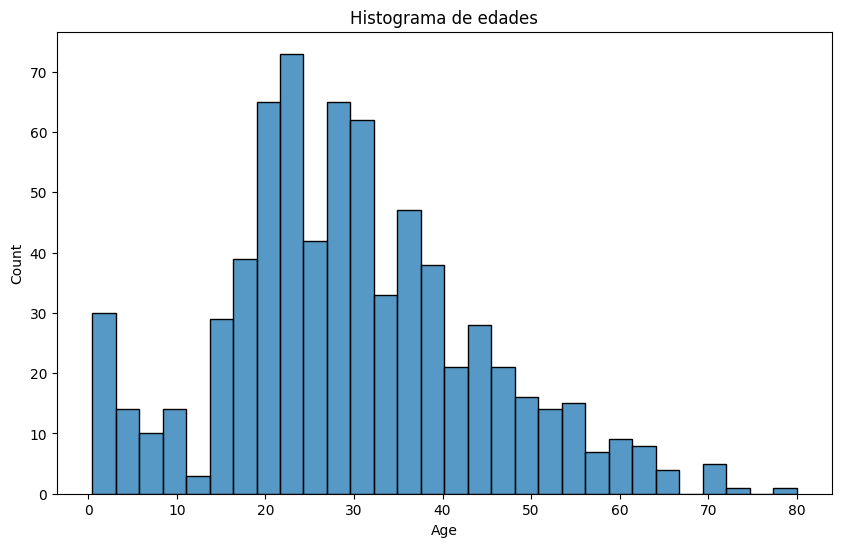

/tmp/ipython-input-2758294843.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'].dropna(), shade=True)


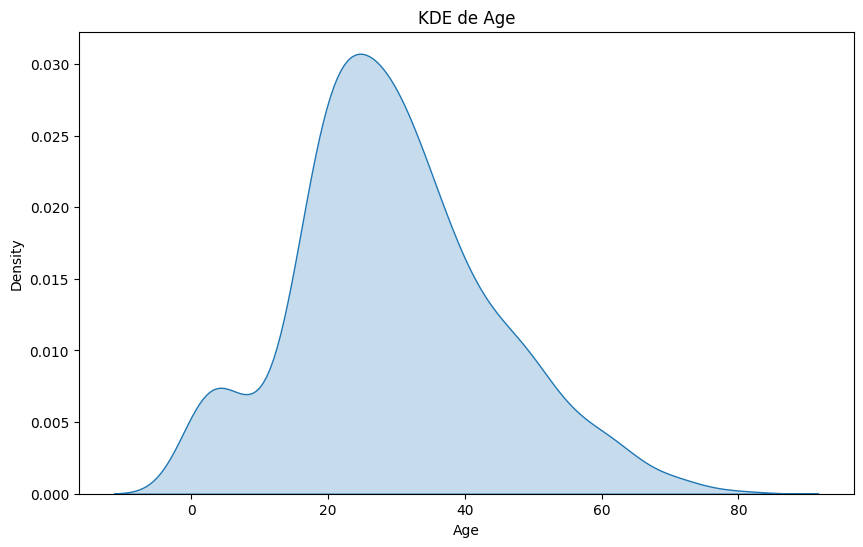

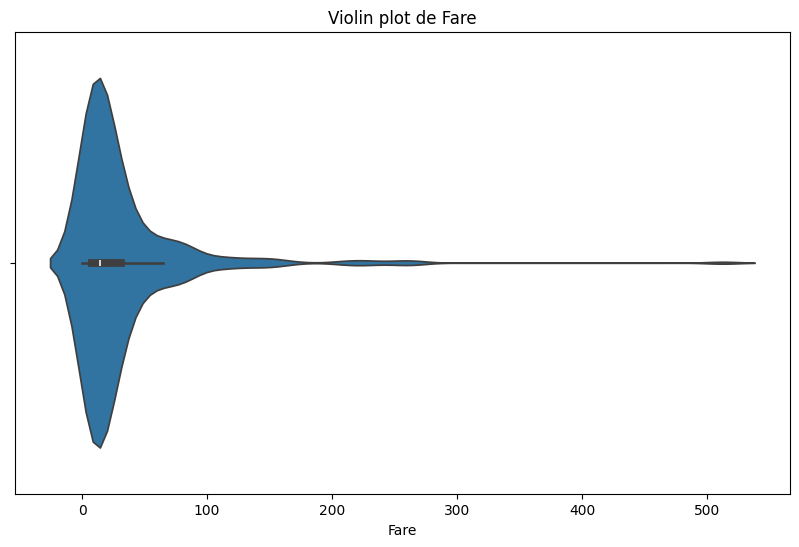

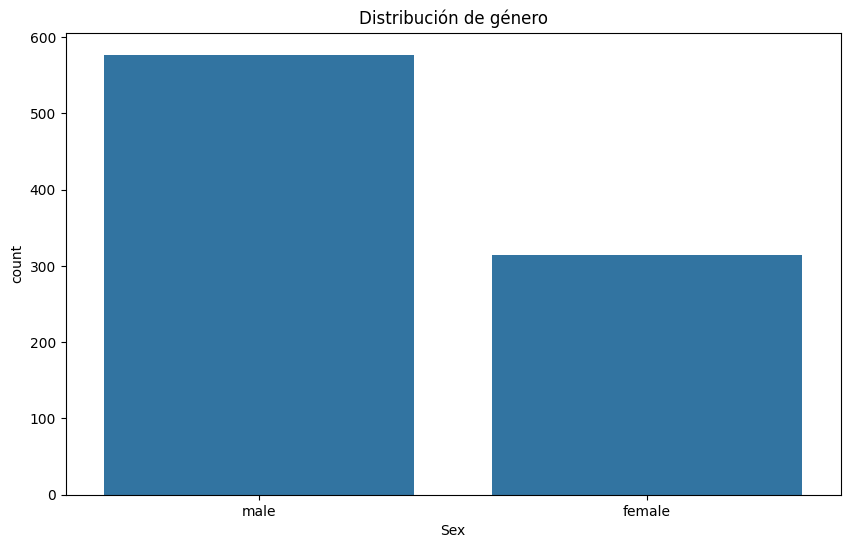

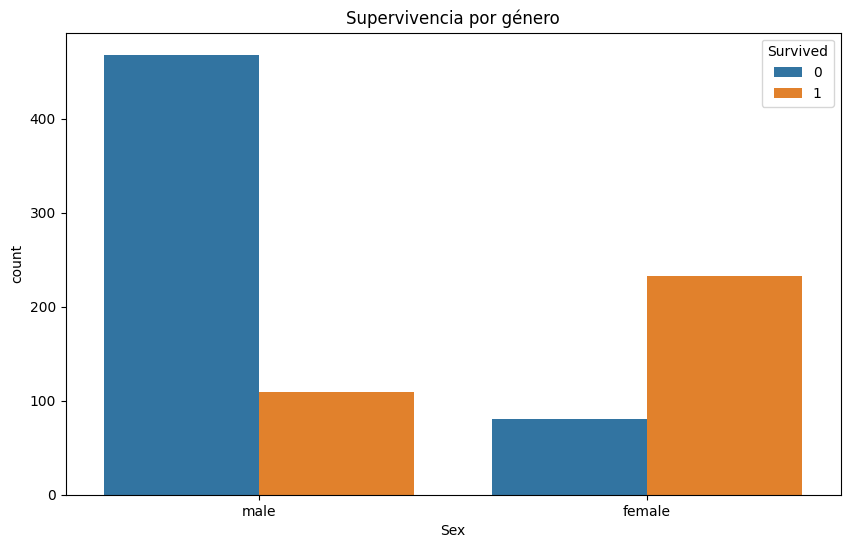

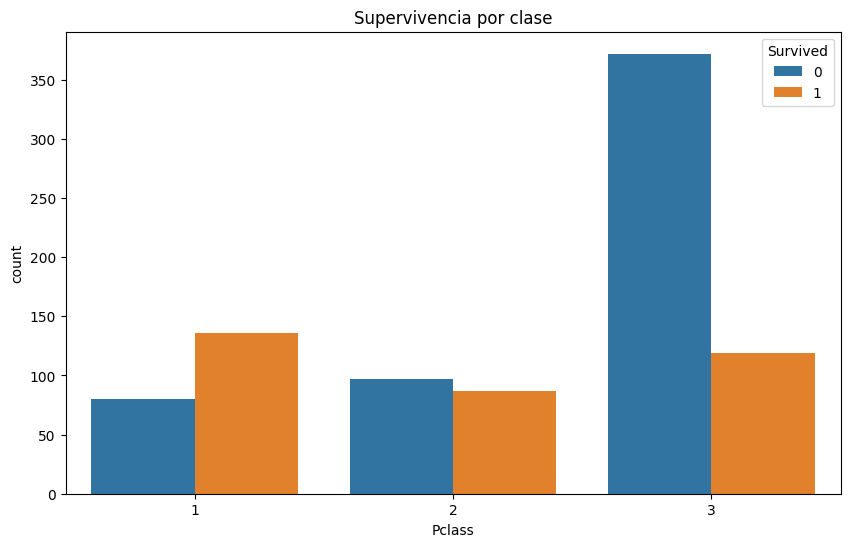

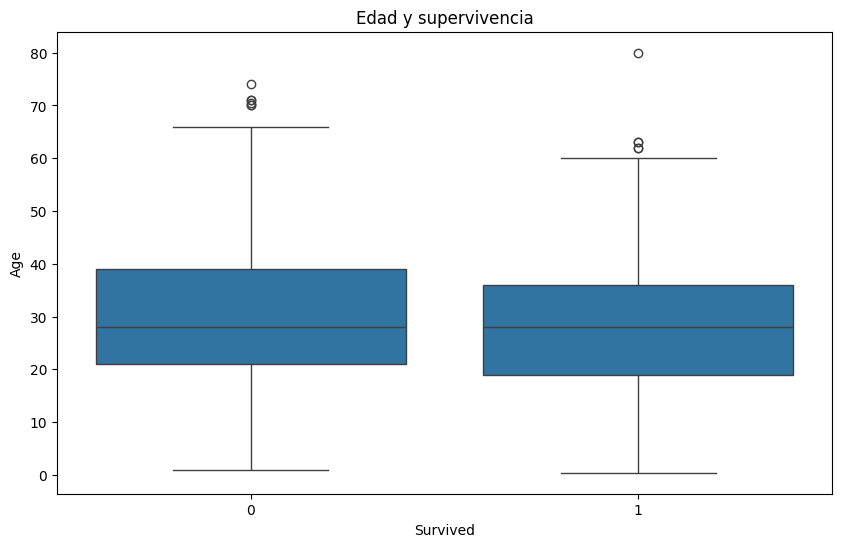

In [ ]:
# CELDA 7 - Visualización
sns.histplot(df['Age'].dropna(), bins=30, kde=False)
plt.title('Histograma de edades')
plt.show()

sns.kdeplot(df['Age'].dropna(), shade=True)
plt.title('KDE de Age')
plt.show()

sns.violinplot(x=df['Fare'])
plt.title('Violin plot de Fare')
plt.show()

sns.countplot(x='Sex', data=df)
plt.title('Distribución de género')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Supervivencia por género')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Supervivencia por clase')
plt.show()

sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Edad y supervivencia')
plt.show()

# Pregunta: ¿Qué se observa en los gráficos?
# Respuesta: La mayoría eran jóvenes, concentrados en 20-40 años. Tarifas bajas para la mayoría.
# Más hombres que mujeres.
# Mujeres sobrevivieron más que hombres.
# Primera clase sobrevivió más que tercera.
# Niños tenían más probabilidad de sobrevivir que adultos mayores.

In [ ]:
# CELDA 8 - Conclusiones
print("Conclusiones:")
print("- Las mujeres tenían más probabilidad de sobrevivir que los hombres.")
print("- Los de primera clase sobrevivieron más que los de tercera.")
print("- Los niños pequeños tuvieron más chances que adultos.")
print("- Las tarifas muestran una gran diferencia económica entre pasajeros.")

# Pregunta final: ¿Qué se concluye del análisis?
# Respuesta: Se priorizó a mujeres, niños y pasajeros de primera clase en la evacuación.

Conclusiones:
- Las mujeres tenían más probabilidad de sobrevivir que los hombres.
- Los de primera clase sobrevivieron más que los de tercera.
- Los niños pequeños tuvieron más chances que adultos.
- Las tarifas muestran una gran diferencia económica entre pasajeros.
